# 반드시 처음부터 끝까지 스켈레톤 코드를 살펴보고 구현하기 시작하길 바란다

## 1. 스켈레톤 코드를 [복사 및 편집] 하여 사용한다.
## 2. 아래의 [Empty Module 3개]를 직접 구현한다.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-ml-tp8/train_Y.csv
/kaggle/input/2021-ml-tp8/sample_submit.csv
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/EMA_definition.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u31.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u36.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u20.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u22.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u07.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u05.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u51.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u27.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u56.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u23.json
/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/Stress_u09

In [2]:
#인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환해주는 라이브러리
from glob import glob
#진행률 표시 해주는 라이브러리
from tqdm import tqdm
#json파일을 위해
import json
#pyplot을 이용해서 어떤 값들을 간단하게 시각화할 수 있다.
from matplotlib import pyplot as plt

In [3]:
#데이터 불러오기
train = pd.read_csv('/kaggle/input/2021-ml-tp8/train_Y.csv')
submit = pd.read_csv('/kaggle/input/2021-ml-tp8/sample_submit.csv')

In [4]:
#데이터 저장하기
train_user = train['user']
test_user = submit['user']
y_train = train['label'].to_numpy()

In [5]:
#train과 test를 합한 total user
total_user = pd.concat([train_user, test_user])
total_user = total_user.sort_values().reset_index(drop=True)

- Sleep, Social, Activity와 관련된 EMA 데이터 불러오기
- 이때, user id에 대응되는 EMA 데이터만 로드한다.

In [6]:
#json 데이터 불러오기 
sleep = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Sleep/*.json'))
social = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Social/*.json'))
activity = sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Activity/*.json'))

In [7]:
#추가적인 실험을 위해 stress와 exercise데이터도 불러왔음
stress=sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Stress/*.json'))
exercise=sorted(glob('/kaggle/input/2021-ml-tp8/StduentLife_EMA/EMA/response/Exercise/*.json'))

In [8]:
#각 sleep, social, activity 데이터를 np.array로 저장

tmp = list()

for i in range(len(sleep)) :
  for k in range(len(total_user)) : 
    if total_user[k] in sleep[i] :
      tmp.append(sleep[i])

sleep = np.array(tmp)

tmp = list()

for i in range(len(social)) :
  for k in range(len(total_user)) : 
    if total_user[k] in social[i] :
      tmp.append(social[i])

social = np.array(tmp)

tmp = list()

for i in range(len(activity)) :
  for k in range(len(total_user)) : 
    if total_user[k] in activity[i] :
      tmp.append(activity[i])

activity = np.array(tmp)

In [9]:
# 추가적인 실험을 위해 stress, exercise도 array로 저장
tmp = list()

for i in range(len(stress)) :
  for k in range(len(total_user)) : 
    if total_user[k] in stress[i] :
      tmp.append(stress[i])

stress = np.array(tmp)
tmp = list()

for i in range(len(exercise)) :
  for k in range(len(total_user)) : 
    if total_user[k] in exercise[i] :
      tmp.append(exercise[i])

exercise = np.array(tmp)

# [Empty Module #1-1] EMA데이터 파싱 - Sleep  

목표: 아래 설문항목에 응답한 user의 EAM 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

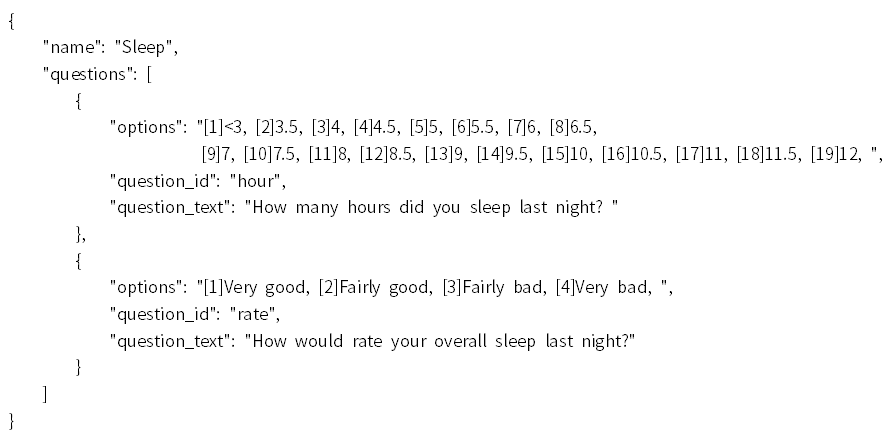

In [10]:
# 아래 설명을 기반으로 Sleep EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'hour','rate'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) How many hours did you sleep last night?
# [1] -> 3, [2]->3.5, [3]->4.0, [4]->4.5 , ... , [18]->11.5, [19]->12

# Hint3) Sleep_rate
# [1] -> 4, [2]->3, [3]->2, [4]->1

# Hint4) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint5) 아래 예시코드를 활용하여 작성할 수 있다.

#sleep의 데이터인 hour, rate, social(추가적인 실험을 위해 포함함)의 리스트 만듦
people_hour = list()  #사람들의 숙면시간을 담은 리스트
people_rate = list() 
people_social = list()

for sp in tqdm(sleep) : 
    
  person_hour = list()
  person_rate = list()
  person_social = list()
    
  with open(sp) as json_file:
    sleep_data = json.load(json_file)
    
  for res in sleep_data :
    
    if 'hour' in res : # 시간에 해당하는 인덱스가 가리키는 값을 넣어줌
    ##############################################
    # 해당 부분을 채우시오.
        if res['hour'] == '1': #인덱스가 1인것은
            person_hour.append(3) #3시간
        elif res['hour'] == '2': #인덱스가 2인 것은
            person_hour.append(3.5) #3.5시간
        elif res['hour'] == '3': #인덱스가 3인 것은
            person_hour.append(4) #4시간
        elif res['hour'] == '4': #인덱스가 4인 것은
            person_hour.append(4.5) #4.5시간
        elif res['hour'] == '5':
            person_hour.append(5) #개인의 리스트에 저장해줌
        elif res['hour'] == '6':
            person_hour.append(5.5)
        elif res['hour'] == '7':
            person_hour.append(6)
        elif res['hour'] == '8':
            person_hour.append(6.5)
        elif res['hour'] == '9':
            person_hour.append(7)
        elif res['hour'] == '10':
            person_hour.append(7.5)
        elif res['hour'] == '11':
            person_hour.append(8)
        elif res['hour'] == '12':
            person_hour.append(8.5)
        elif res['hour'] == '13':
            person_hour.append(9)
        elif res['hour'] == '14':
            person_hour.append(9.5)
        elif res['hour'] == '15':
            person_hour.append(10)
        elif res['hour'] == '16':
            person_hour.append(10.5)
        elif res['hour'] == '17':
            person_hour.append(11)
        elif res['hour'] == '18':
            person_hour.append(11.5)
        elif res['hour'] == '19':
            person_hour.append(12)
        else: #인덱스가 적절하지 않은 경우 
            person_hour.append('NaN') #'NaN'을 저장
    ##############################################
    if 'rate' in res : #rate의 인덱스가 가리키는 수를 저장
    ##############################################
    # 해당 부분을 채우시오.
        if res['rate'] == '1': #인덱스가 1이면
            person_rate.append(4) # 4저장
        elif res['rate'] == '2':
            person_rate.append(3)
        elif res['rate'] == '3':
            person_rate.append(2)
        elif res['rate'] == '4':
            person_rate.append(1)
        else:#인덱스가 적절하지 않은 경우 
            person_rate.append('NaN')#'NaN'을 저장
    ##############################################
    
    if 'social' in res : # (추가적으로 더해준 코드) -> 성능에 영향이 없었다
        if res['social'] == '1': #얼마나 사회생활을 하는데 힘든가
            person_social.append(0)
        elif res['social'] == '2':
            person_social.append(1)
        elif res['social'] == '3':
            person_social.append(2)
        elif res['social'] == '4': #인덱스가 커질 수록 사회생활을 하는데에 힘들지 않은 것임
            person_social.append(3)
        else:#인덱스가 적절하지 않은 경우 
            person_social.append('NaN')#'NaN'을 저장

  people_hour.append(person_hour) #개인의 리스트에 저장했던 것을 사람들의 리스트에 넣음
  people_rate.append(person_rate)
  people_social.append(person_social)

100%|██████████| 46/46 [00:00<00:00, 159.49it/s]


# [Empty Module #1-2] EMA데이터 파싱 - Social  

목표: 아래 설문항목에 응답한 user의 EAM 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

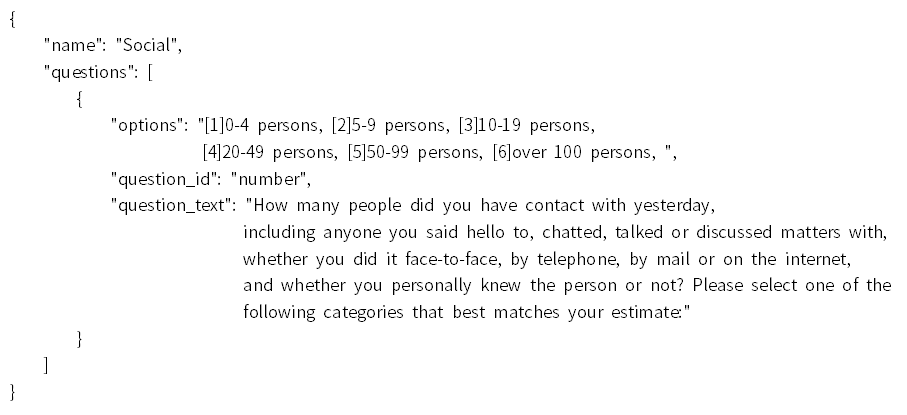

In [11]:
# 아래 설명을 기반으로 Social EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'number'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) Social
# [1]->0, [2]->5, [3]->10, [4]->20, [5]->50, [6]->100

# Hint3) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint4) 아래 예시코드를 활용하여 작성할 수 있다.

people_contact = list() #social영역에 있는 데이터

for soc in tqdm(social) :
  person_contact = list()
  with open(soc) as json_file:
    social_data = json.load(json_file)
  for res in social_data :
    if 'number' in res : #인덱스가 가리키는 값을 저장해줌
    ##############################################
    # 해당 부분을 채우시오.
        if res['number'] == '1': #인덱스가 1이면
            person_contact.append(0) #0명의 사람을 만난 것으로 
        elif res['number'] == '2': #인덱스가 2이면
            person_contact.append(5) #5명의 사람을 만난 것으로
        elif res['number'] == '3': #인덱스가 3이면
            person_contact.append(10) #10명의 사람을 만난 것으로 --- 저장
        elif res['number'] == '4':
            person_contact.append(20) #개인의 배열에 저장
        elif res['number'] == '5':
            person_contact.append(50)
        elif res['number'] == '6': #인덱스가 커질수록 여러 사람과 접촉
            person_contact.append(100)
        else:
            person_contact.append('NaN')
    ##############################################

  people_contact.append(person_contact) #개인의 리스트에 저장했던 것을 사람들의 리스트에 넣음

100%|██████████| 46/46 [00:00<00:00, 171.79it/s]


# [Empty Module #1-3] EMA데이터 파싱 - Activity  

목표: 아래 설문항목에 응답한 user의 EAM 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

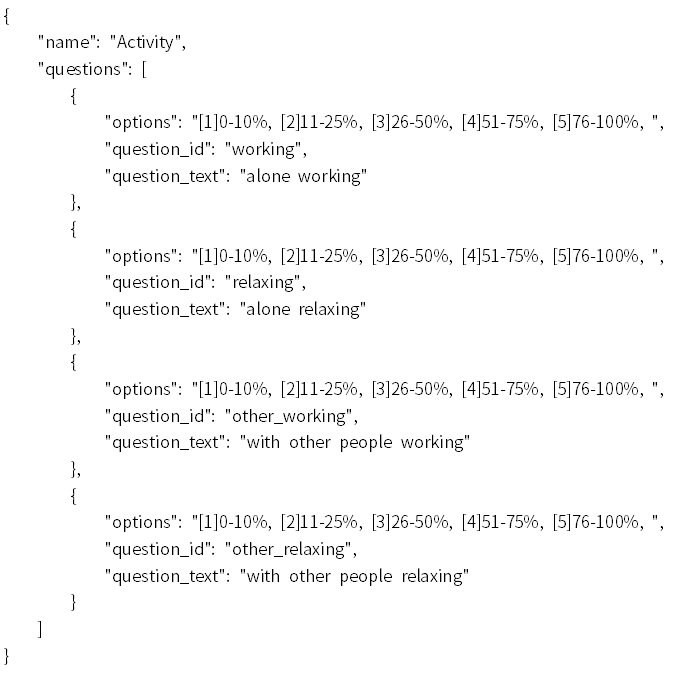

In [12]:
# 아래 설명을 기반으로 Activity EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'other_relaxing','other_working',
#                                 'relaxing','working'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) Activity
# [1]->0, [2]->0.11, [3]->0.26, [4]->0.51, [5]->0.76

# Hint3) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint4) 아래 예시코드를 활용하여 작성할 수 있다.

people_work_alone = list() 
people_work_other = list()
people_relaxing_alone = list() 
people_relaxing_other = list()

for act in tqdm(activity) :

  person_work_alone = list() 
  person_work_other = list()
  person_relaxing_alone = list() 
  person_relaxing_other = list()

  with open(act) as json_file:
    activity_data = json.load(json_file)

  for res in activity_data : #여기의 인덱스에 해당하는 값을 저장해준다. activity부분은 비율로 지정되어 있다.
    
    if 'other_relaxing' in res :
    ##############################################
    # 해당 부분을 채우시오.
        if res['other_relaxing']=='1': #인덱스의 값이 1이면
            person_relaxing_other.append(0) #0%라고 저장
        elif res['other_relaxing']=='2': #인덱스의 값이 2이면
            person_relaxing_other.append(0.11) #0.11%라고 저장
        elif res['other_relaxing']=='3':
            person_relaxing_other.append(0.26)
        elif res['other_relaxing']=='4':
            person_relaxing_other.append(0.51)
        elif res['other_relaxing']=='5':
            person_relaxing_other.append(0.76)
        else:
            person_relaxing_other.append('NaN')
    ##############################################

    if 'other_working' in res :
    ##############################################
    # 해당 부분을 채우시오.
        if res['other_working']=='1':
            person_work_other.append(0)
        elif res['other_working']=='2':
            person_work_other.append(0.11)
        elif res['other_working']=='3':
            person_work_other.append(0.26)
        elif res['other_working']=='4':
            person_work_other.append(0.51)
        elif res['other_working']=='5':
            person_work_other.append(0.76)
        else:
            person_work_other.append('NaN')
    ##############################################

    if 'relaxing' in res :
    ##############################################
    # 해당 부분을 채우시오.
        if res['relaxing']=='1':
            person_relaxing_alone.append(0)
        elif res['relaxing']=='2':
            person_relaxing_alone.append(0.11)
        elif res['relaxing']=='3':
            person_relaxing_alone.append(0.26)
        elif res['relaxing']=='4':
            person_relaxing_alone.append(0.51)
        elif res['relaxing']=='5':
            person_relaxing_alone.append(0.76)
        else:
            person_relaxing_alone.append('NaN')
    ##############################################

    if 'working' in res :
    ##############################################
    # 해당 부분을 채우시오.
        if res['working']=='1':
            person_work_alone.append(0)
        elif res['working']=='2':
            person_work_alone.append(0.11)
        elif res['working']=='3':
            person_work_alone.append(0.26)
        elif res['working']=='4':
            person_work_alone.append(0.51)
        elif res['working']=='5':
            person_work_alone.append(0.76)
        else:
            person_work_alone.append('NaN')
    ##############################################

  people_relaxing_other.append(person_relaxing_other)
  people_work_other.append(person_work_other)
  people_relaxing_alone.append(person_relaxing_alone)
  people_work_alone.append(person_work_alone)

100%|██████████| 46/46 [00:00<00:00, 173.53it/s]


In [13]:
people_stress = list() #추가적인 실험의 stress 레벨을 추가하는 함수

for soc in tqdm(stress) : #하지만 이 것은 성능을 올리는 데에 쓰이진 못했다. 
  person_stress = list()
  with open(soc) as json_file:
    stress_data = json.load(json_file)
  for res in stress_data :
    if 'level' in res :
        if res['level']=='1':
            person_stress.append(0)
        elif res['level']=='2':
            person_stress.append(1)
        elif res['level']=='3':
            person_stress.append(2)
        elif res['level']=='4':
            person_stress.append(3)
        elif res['level']=='5':
            person_stress.append(4)
        else:
            person_stress.append('NaN')
  
  people_stress.append(person_stress)

100%|██████████| 46/46 [00:00<00:00, 176.93it/s]


In [14]:

people_exercise = list()


for sp in tqdm(exercise) :  #추가적인 실험을 위한 운동 데이터 
    

  person_exercise = list()

    
  with open(sp) as json_file:
    exercise_data = json.load(json_file)
    
  for res in exercise_data :
    

    
    if 'exercise' in res : #운동 시간에 따라 인덱스 속에 값이 있었다. (-> 성능 높이기엔 쓰이지 못했음)
        if res['exercise']=='1':
            person_exercise.append(0)
        elif res['exercise']=='2':
            person_exercise.append(15)
        elif res['exercise']=='3':
            person_exercise.append(45)
        elif res['exercise']=='4':
            person_exercise.append(75)
        elif res['exercise']=='5':
            person_exercise.append(105)
        else:
            person_exercise.append('NaN')
        

  people_exercise.append(person_exercise)

100%|██████████| 46/46 [00:00<00:00, 181.81it/s]


- 앞서 알맞게 데이터를 파싱했다면 아래 부분은 해당 데이터를 기반으로 Feature를 추출하기 위한 준비단계이다.
- 가장먼저 데이터의 type을 float형으로 변경하고, 판다스의 DataFrame으로 변경한다. 그리고 train/test 데이터셋 파싱을 위해서 가장 첫번째 column에 user id를 추가한다.

In [15]:
student_sleep = pd.DataFrame(people_hour).astype('float64') #type을 float64로 변경해준다.
student_sleep_rate = pd.DataFrame(people_rate).astype('float64') #DataFrame 생성
student_contact = pd.DataFrame(people_contact).astype('float64') #DataFrame을 생성할 데이터 소스는 앞에서 만들어준 people들의 정보 담은 리스트
student_working_alone = pd.DataFrame(people_work_alone).astype('float64')
student_working_other = pd.DataFrame(people_work_other).astype('float64')
student_relaxing_alone = pd.DataFrame(people_relaxing_alone).astype('float64')
student_relaxing_other = pd.DataFrame(people_relaxing_other).astype('float64')

student_sleep['uid'] = total_user # train + test id가 들어있음
student_sleep_rate['uid'] = total_user # 나중에 알맞게 데이터 추출을 해주어야함
student_contact['uid'] = total_user
student_working_alone['uid'] = total_user
student_working_other['uid'] = total_user
student_relaxing_alone['uid'] = total_user
student_relaxing_other['uid'] = total_user

student_sleep = student_sleep[(['uid']+list(range(0,student_sleep.shape[1]-1)))] #첫 열에 id를 추가해준다. -> 데이터 추출을 위함
student_sleep_rate = student_sleep_rate[(['uid']+list(range(0,student_sleep_rate.shape[1]-1)))]
student_contact = student_contact[(['uid']+list(range(0,student_contact.shape[1]-1)))]
student_working_alone = student_working_alone[(['uid']+list(range(0,student_working_alone.shape[1]-1)))]
student_working_other = student_working_other[(['uid']+list(range(0,student_working_other.shape[1]-1)))]
student_relaxing_alone = student_relaxing_alone[(['uid']+list(range(0,student_relaxing_alone.shape[1]-1)))]
student_relaxing_other = student_relaxing_other[(['uid']+list(range(0,student_relaxing_other.shape[1]-1)))]

In [16]:
# 추가적인 실험을 위한 코드에도 같은 작업을 해준다.
student_sleep_social = pd.DataFrame(people_social).astype('float64')
student_sleep_social['uid']=total_user
student_sleep_social = student_sleep_social[(['uid']+list(range(0,student_sleep_social.shape[1]-1)))]

student_stress=pd.DataFrame(people_stress).astype('float64')
student_stress['uid']=total_user
student_stress = student_stress[(['uid']+list(range(0,student_stress.shape[1]-1)))]

student_exercise=pd.DataFrame(people_exercise).astype('float64')
student_exercise['uid']=total_user
student_exercise = student_exercise[(['uid']+list(range(0,student_exercise.shape[1]-1)))]


# [Empty Module #2-1] Feature extract

목표: 앞서 파싱한 EMA 응답 데이터에서 통계적 feature를 추출한다. 

- 앞서 추가한 ueser id(uid)를 기준으로 trian/test 유저에 데이터를 나눈다. 그리고 해당 유저의 데이터를 pandas에서 제공하는 describe 함수를 이용해 통계적 feature를 추출한다. 
- 통계적 feature는 총 7차원이며 각 구성은 아래 추가설명과 같다. (describe함수의 가장 첫번째 column인 count는 제거한다.)

[추가설명]

이때, pandas의 describe 함수는 다음과 같이 구성된다. ([설명링크](https://www.javatpoint.com/pandas-dataframe-describe))

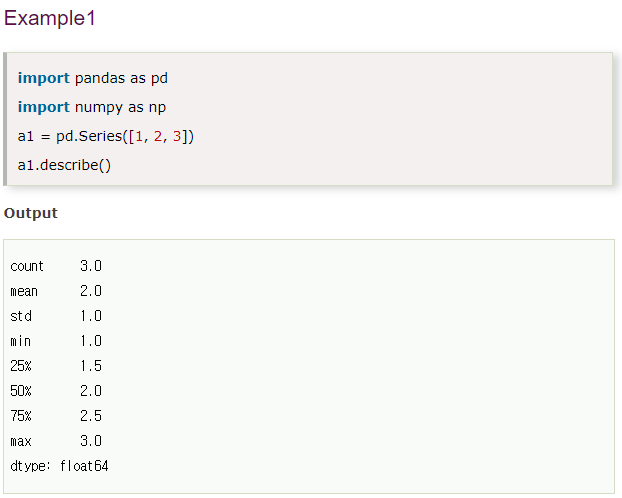

In [17]:
# train셋에 대한 feature를 추출하시오.

################################################################

# 1. train_user에 해당하는 데이터만 파싱한다. 
# 2. pandas의 describe 함수를 이용해 feature를 추출한다.
    
################################################################

# Hint 1) 
# A[A['uid'].isin(train_user)]
# Hint 2)
# A.T.describe().to_numpy()


train_features_student_sleep = student_sleep[student_sleep['uid'].isin(train_user)] # id에 해당하는 값을 찾은 후
train_features_student_sleep = train_features_student_sleep.drop(['uid'],axis=1) #id를 drop해주고 
train_features_student_sleep = train_features_student_sleep.T.describe().to_numpy() #행렬의 축을 바꾼 후에 요약-> 데이터 추출

train_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(train_user)]
train_features_student_sleep_rate=train_features_student_sleep_rate.drop(['uid'],axis=1)
train_features_student_sleep_rate=train_features_student_sleep_rate.T.describe().to_numpy()

train_features_student_contact = student_contact[student_contact['uid'].isin(train_user)]
train_features_student_contact=train_features_student_contact.drop(['uid'],axis=1)
train_features_student_contact=train_features_student_contact.T.describe().to_numpy()

train_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(train_user)]
train_features_student_working_alone=train_features_student_working_alone.drop(['uid'],axis=1)
train_features_student_working_alone=train_features_student_working_alone.T.describe().to_numpy()

train_features_student_working_other = student_working_other[student_working_other['uid'].isin(train_user)]
train_features_student_working_other=train_features_student_working_other.drop(['uid'],axis=1)
train_features_student_working_other=train_features_student_working_other.T.describe().to_numpy()

train_features_student_relaxing_alone =student_relaxing_alone[student_relaxing_alone['uid'].isin(train_user)]
train_features_student_relaxing_alone=train_features_student_relaxing_alone.drop(['uid'],axis=1)
train_features_student_relaxing_alone=train_features_student_relaxing_alone.T.describe().to_numpy()

train_features_student_relaxing_other =student_relaxing_other[student_relaxing_other['uid'].isin(train_user)]
train_features_student_relaxing_other=train_features_student_relaxing_other.drop(['uid'],axis=1)
train_features_student_relaxing_other=train_features_student_relaxing_other.T.describe().to_numpy()


In [18]:
# 추가 해준 데이터에도 같은 작업을 해준다.
train_features_student_sleep_social = student_sleep_social[student_sleep_social['uid'].isin(train_user)]
train_features_student_sleep_social = train_features_student_sleep_social.drop(['uid'],axis=1)
train_features_student_sleep_social = train_features_student_sleep_social.T.describe().to_numpy()

train_features_student_stress = student_stress[student_stress['uid'].isin(train_user)]
train_features_student_stress=train_features_student_stress.drop(['uid'],axis=1)
train_features_student_stress=train_features_student_stress.T.describe().to_numpy()

train_features_student_exercise = student_exercise[student_exercise['uid'].isin(train_user)]
train_features_student_exercise=train_features_student_exercise.drop(['uid'],axis=1)
train_features_student_exercise=train_features_student_exercise.T.describe().to_numpy()


In [19]:
# test셋에 대한 feature를 추출하시오.

################################################################

# 1. test_user에 해당하는 데이터만 파싱한다. 
# 2. pandas의 describe 함수를 이용해 feature를 추출한다.
    
################################################################

# Hint 1) 
# A[A['uid'].isin(test_user)]
# Hint 2)
# A.T.describe().to_numpy()


test_features_student_sleep = student_sleep[student_sleep['uid'].isin(test_user)]# id에 해당하는 값을 찾은 후
test_features_student_sleep=test_features_student_sleep.drop(['uid'],axis=1) #id를 drop해주고 
test_features_student_sleep=test_features_student_sleep.T.describe().to_numpy() #행렬의 축을 바꾼 후에 요약-> 데이터 추출

test_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(test_user)]
test_features_student_sleep_rate=test_features_student_sleep_rate.drop(['uid'],axis=1)
test_features_student_sleep_rate=test_features_student_sleep_rate.T.describe().to_numpy()

test_features_student_contact = student_contact[student_contact['uid'].isin(test_user)]
test_features_student_contact = test_features_student_contact.drop(['uid'],axis=1)
test_features_student_contact = test_features_student_contact.T.describe().to_numpy()

test_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(test_user)]
test_features_student_working_alone = test_features_student_working_alone.drop(['uid'],axis=1)
test_features_student_working_alone =test_features_student_working_alone.T.describe().to_numpy()

test_features_student_working_other = student_working_other[student_working_other['uid'].isin(test_user)]
test_features_student_working_other = test_features_student_working_other.drop(['uid'],axis=1)
test_features_student_working_other = test_features_student_working_other.T.describe().to_numpy()

test_features_student_relaxing_alone =student_relaxing_alone[student_relaxing_alone['uid'].isin(test_user)]
test_features_student_relaxing_alone =test_features_student_relaxing_alone.drop(['uid'],axis=1)
test_features_student_relaxing_alone =test_features_student_relaxing_alone.T.describe().to_numpy()

test_features_student_relaxing_other =student_relaxing_other[student_relaxing_other['uid'].isin(test_user)]
test_features_student_relaxing_other =test_features_student_relaxing_other.drop(['uid'],axis=1)
test_features_student_relaxing_other =test_features_student_relaxing_other.T.describe().to_numpy()


In [20]:
# 추가 해준 데이터에도 같은 작업을 해준다.
test_features_student_sleep_social = student_sleep_social[student_sleep_social['uid'].isin(test_user)]
test_features_student_sleep_social = test_features_student_sleep_social.drop(['uid'],axis=1)
test_features_student_sleep_social = test_features_student_sleep_social.T.describe().to_numpy()

test_features_student_stress = student_stress[student_stress['uid'].isin(test_user)]
test_features_student_stress=test_features_student_stress.drop(['uid'],axis=1)
test_features_student_stress=test_features_student_stress.T.describe().to_numpy()

test_features_student_exercise = student_exercise[student_exercise['uid'].isin(test_user)]
test_features_student_exercise=test_features_student_exercise.drop(['uid'],axis=1)
test_features_student_exercise=test_features_student_exercise.T.describe().to_numpy()


# [Empty Module #2-2] Feature에서 Nan값 처리하기

- 데이터에 NaN값을 Imputer를 통해서 채운다. 하지만 우울증의 경우 소수의 데이터를 제외한 나머지를 NaN으로 채우면 실제 일부 우울증 패턴이 없어질 수 있다. 따라서 describe를 통해 추출한 Feature에 대해서 Nan에 값이 있을 경우에 Imputer를 통해 NaN을 채운다.

In [21]:
# Imputer를 이용해 Nan 데이터 평균값으로 채우기

################################################################

# Hint 1) 
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(A)
# A = imp_mean.transform(A)
# B = imp_mean.transform(B)
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #nan값을 nan값이 아닌 데이터들의 평균으로 대체해준다.

imp_mean.fit(train_features_student_sleep)
train_features_student_sleep = imp_mean.transform(train_features_student_sleep)
test_features_student_sleep = imp_mean.transform(test_features_student_sleep)

imp_mean.fit(train_features_student_sleep_rate)
train_features_student_sleep_rate = imp_mean.transform(train_features_student_sleep_rate)
test_features_student_sleep_rate = imp_mean.transform(test_features_student_sleep_rate)

imp_mean.fit(train_features_student_contact)
train_features_student_contact = imp_mean.transform(train_features_student_contact)
test_features_student_contact = imp_mean.transform(test_features_student_contact)

imp_mean.fit(train_features_student_working_alone)
train_features_student_working_alone = imp_mean.transform(train_features_student_working_alone)
test_features_student_working_alone = imp_mean.transform(test_features_student_working_alone)

imp_mean.fit(train_features_student_working_other)
train_features_student_working_other = imp_mean.transform(train_features_student_working_other)
test_features_student_working_other = imp_mean.transform(test_features_student_working_other)

imp_mean.fit(train_features_student_relaxing_alone)
train_features_student_relaxing_alone = imp_mean.transform(train_features_student_relaxing_alone)
test_features_student_relaxing_alone = imp_mean.transform(test_features_student_relaxing_alone)

imp_mean.fit(train_features_student_relaxing_other)
train_features_student_relaxing_other = imp_mean.transform(train_features_student_relaxing_other)
test_features_student_relaxing_other = imp_mean.transform(test_features_student_relaxing_other)

################################################################

In [22]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')#nan값을 nan값이 아닌 데이터들의 평균으로 대체해준다.
imp_mean.fit(train_features_student_sleep_social)
train_features_student_sleep_social = imp_mean.transform(train_features_student_sleep_social)
test_features_student_sleep_social = imp_mean.transform(test_features_student_sleep_social)


imp_mean.fit(train_features_student_exercise)
train_features_student_exercise = imp_mean.transform(train_features_student_exercise)
test_features_student_exercise = imp_mean.transform(test_features_student_exercise)

imp_mean.fit(train_features_student_stress)
train_features_student_stress = imp_mean.transform(train_features_student_stress)
test_features_student_stress = imp_mean.transform(test_features_student_stress)

# [Empty Module #3-1] Sleep feature만 이용하여 우울증 예측하기

- 6주차 실습문제에서 우리는 수면시간에 따른 우울증 예측을 수행하였다. 그리고 앞선 과정이 실제 해당 실습문제에서 제공된 Feature 가공 방법이다. 이를 확인하기위해 앞에서 구축한 Feature 중 sleep과 관련된 feature만을 사용하여 우울증을 예측한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [23]:
# Sleep feature만 이용해 우울증을 예측한다. 

#######################################################################

# 1. describe에서 제공하는 통계적 feature 중 count는 제외한 나머지를 사용한다. 

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_sleep
# train_features_student_sleep_rate

# test
# test_features_student_sleep
# test_features_student_sleep_rate

# Hint 2) 예시코드

#  tmp_x = list()
#  tmp_x.append(train_features_student_sleep[1:8,i])
#  tmp_x.append(train_features_student_sleep_rate[1:8,i])
#  X_train.append(tmp_x)

#######################################################################

X_train = list() #sleep데이터 속의 데이터들로만 예측을 해봤을 때

for i in range(train_features_student_sleep.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list() 
    tmp_x.append(train_features_student_sleep[1:8,i])#문제의 조건대로 count를 뺀 mean, std, min, 25%, 50%, 75%, max로만 예측한다.
    tmp_x.append(train_features_student_sleep_rate[1:8,i]) # 그래서 [1:8]
    X_train.append(tmp_x)
    ##############################################

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_sleep.shape[1],-1)

X_test = list()

for i in range(test_features_student_sleep.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list()
    tmp_x.append(test_features_student_sleep[1:8,i])
    tmp_x.append(test_features_student_sleep_rate[1:8,i])
    X_test.append(tmp_x)
    ##############################################

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_sleep.shape[1],-1)

In [24]:
# SVM을 이용해 이진분류 수행하기 
from sklearn.svm import SVC
#######################################################################

# Hint 1)
# tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#######################################################################
# Sleep feature를 이용한 분류결과 확인하기 
clf = SVC(C=1,kernel='linear')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
y_pred=clf.predict(X_test)
submit['label'] = y_pred #예측값을 저장후
submit.to_csv("/kaggle/working/submit_SVC_sleep_features.csv", index=False) #csv로 만들기

0.9130434782608695


# [Empty Module #3-2] Social feature만 이용하여 우울증 예측하기

- 앞서 수면과 관련된 EMA 데이터를 이용해 우울증을 에측해 성능을 확인했다면, 이제는 Activity관련 feature를 이용해 우울증 예측을 진행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [25]:
# Social feature만 이용해 우울증을 예측한다. 

#######################################################################

# 1. describe에서 제공하는 통계적 feature 중 count는 제외한 나머지를 사용한다. 

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_contact

# test
# test_features_student_contact
    
#######################################################################

X_train = list()

for i in range(train_features_student_contact.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list() #train데이터
    tmp_x.append(train_features_student_contact[1:8,i])#문제의 조건대로 count를 뺀 mean, std, min, 25%, 50%, 75%, max로만 예측한다.
    X_train.append(tmp_x)
    ##############################################

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_contact.shape[1],-1)

X_test = list()

for i in range(test_features_student_contact.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list() #test데이터
    tmp_x.append(test_features_student_contact[1:8,i]) 
    X_test.append(tmp_x)
    ##############################################

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_contact.shape[1],-1)

In [26]:
# SVM을 이용해 이진분류 수행하기 

#######################################################################

# Hint 1)
# tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = SVC(C=1,kernel='linear') 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
y_pred=clf.predict(X_test)
submit['label'] = y_pred
#######################################################################

# Activity feature를 이용한 분류결과 확인하기 

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_social_features.csv", index=False)

0.7391304347826086


# [Empty Module #3-3] Activity feature만 이용하여 우울증 예측하기

- 앞서 수면, 활동과 관련된 EMA 데이터를 이용해 우울증을 에측해 성능을 확인했다면, 이제는 Social과 관련 feature를 이용해 우울증 예측을 진행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [27]:
# Activity feature만 이용해 우울증을 예측한다. 

#######################################################################

# 1. describe에서 제공하는 통계적 feature 중 count는 제외한 나머지를 사용한다. 

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_working_alone
# train_features_student_working_other
# train_features_student_relaxing_alone
# train_features_student_relaxing_other

# test
# test_features_student_working_alone
# test_features_student_working_other
# test_features_student_relaxing_alone
# test_features_student_relaxing_other
    
#######################################################################

X_train = list()

for i in range(train_features_student_sleep.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list()
    tmp_x.append(train_features_student_working_alone[1:8,i]) #문제의 조건대로 count를 뺀 mean, std, min, 25%, 50%, 75%, max로만 예측한다.
    tmp_x.append(train_features_student_working_other[1:8,i]) #그래서 [1:8]
    tmp_x.append(train_features_student_relaxing_alone[1:8,i])
    tmp_x.append(train_features_student_relaxing_other[1:8,i])
    X_train.append(tmp_x)
    ##############################################

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_sleep.shape[1],-1)

X_test = list()

for i in range(test_features_student_sleep.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list()
    tmp_x.append(test_features_student_working_alone[1:8,i])
    tmp_x.append(test_features_student_working_other[1:8,i])
    tmp_x.append(test_features_student_relaxing_alone[1:8,i])
    tmp_x.append(test_features_student_relaxing_other[1:8,i])
    X_test.append(tmp_x)
    ##############################################

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_sleep.shape[1],-1)

In [28]:
# SVM을 이용해 이진분류 수행하기 

#######################################################################

# Hint 1)
# tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = SVC(C=1,kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
#######################################################################

# Social feature를 이용한 분류결과 확인하기 

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_activity_features.csv", index=False)

0.7391304347826086


# [Empty Module #3-4] 모든 feature를 이용하여 우울증 예측하기

- 앞서 수면, 활동, 사회성과 관련된 EMA 데이터에서 추출한 feature 각각을 이용해 우울증을 분류하였다면, 모든 feautre를 통합하여 분류를 수행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [29]:
# Social feature만 이용해 우울증을 예측한다. 

#######################################################################

# 1. describe에서 제공하는 통계적 feature 중 count는 제외한 나머지를 사용한다. 

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_sleep
# train_features_student_sleep_rate
# train_features_student_contact
# train_features_student_working_alone
# train_features_student_working_other
# train_features_student_relaxing_alone
# train_features_student_relaxing_other

# test
# test_features_student_sleep
# test_features_student_sleep_rate
# test_features_student_contact
# test_features_student_working_alone
# test_features_student_working_other
# test_features_student_relaxing_alone
# test_features_student_relaxing_other
    
#######################################################################

X_train = list() 

for i in range(train_features_student_working_alone.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list() # ALL부분에 sleep데이터 속 social을 추가 하였다.
    tmp_x.append(train_features_student_sleep[1:8,i]) #문제의 조건대로 count를 뺀 mean, std, min, 25%, 50%, 75%, max로만 예측한다.
    tmp_x.append(train_features_student_sleep_rate[1:8,i]) #그래서 [1:8]
    tmp_x.append(train_features_student_contact[1:8,i])
    tmp_x.append(train_features_student_working_alone[1:8,i])
    tmp_x.append(train_features_student_working_other[1:8,i])
    tmp_x.append(train_features_student_relaxing_alone[1:8,i])
    tmp_x.append(train_features_student_relaxing_other[1:8,i])
    #tmp_x.append(train_features_student_sleep_social[1:8,i])
    #tmp_x.append(train_features_student_exercise[1:8,i]) #오히려 성능이 떨어졌다.
    #tmp_x.append(train_features_student_stress[1:8,i])
    #tmp_x.append(train_features_student_walk[1:8,i])
    
    X_train.append(tmp_x)
    ##############################################

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1],-1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]) : 
  
    ##############################################
    # 해당 부분을 채우시오.
    tmp_x = list()
    tmp_x.append(test_features_student_sleep[1:8,i])
    tmp_x.append(test_features_student_sleep_rate[1:8,i])
    tmp_x.append(test_features_student_contact[1:8,i])
    tmp_x.append(test_features_student_working_alone[1:8,i])
    tmp_x.append(test_features_student_working_other[1:8,i])
    tmp_x.append(test_features_student_relaxing_alone[1:8,i])
    tmp_x.append(test_features_student_relaxing_other[1:8,i])
    #tmp_x.append(test_features_student_sleep_social[1:8,i])
    #tmp_x.append(test_features_student_exercise[1:8,i])
    #tmp_x.append(test_features_student_stress[1:8,i])
    #tmp_x.append(test_features_student_walk[1:8,i])
    X_test.append(tmp_x)
    ##############################################

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1],-1)

In [30]:
# SVM을 이용해 이진분류 수행하기 

#######################################################################

# Hint 1)
# tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#######################################################################

clf = SVC(C=1,kernel='linear',class_weight='balanced') #결과적으로 성능에 가장 효과 있었떤 파라미터
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test) #X_test로 예측해주기
print(clf.score(X_train, y_train)) #train데이터의 예측 점수 보기


# Sleep+Activity+Social feature를 이용한 분류결과 확인하기 

submit['label'] = y_pred
submit.to_csv("/kaggle/working/submit_SVC_All_features.csv", index=False)

0.9130434782608695


In [31]:
submit

,user,label
0,u02,1
1,u04,1
2,u09,0
3,u12,0
4,u13,0
5,u15,0
6,u17,1
7,u18,1
8,u20,1
9,u23,1


# 결론

- 다양한 EMA 데이터를 통해 추출한 Feature를 융합해서 사용하면 더 좋은 성능으로 우울증 분류가 가능함을 확인할 수 있다. 이를 통해서 실제 Feature representation에 따른 성능차이를 확인할 수 있다.

## 추가실험

- 해당 데이터셋은 데이터 imbalnce 문제가 심각하다. 따라서 이를 해결하기 위한 방법을 추가적으로 사용하여 성능을 향상시킬 수 있다.
- 현재 스켈레톤 코드에서는 사용하지 않는 'Stress', 'Exercise'에 대한 EMA 데이터도 제공한다. 이를 추가적으로 이용하여 성능응 향상시킬 수 있다.



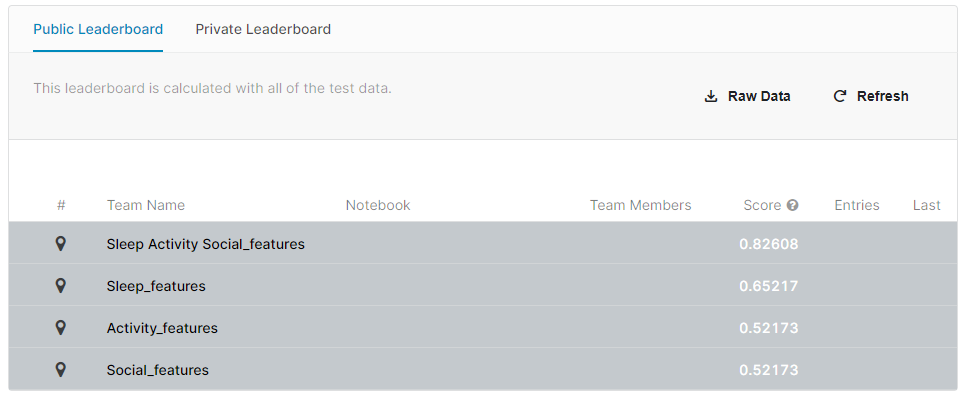